In [94]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn tools
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [95]:
# Loading in the dataset
spotify = pd.read_csv("spotify.csv")

# Dropping unnecessary columns
spotify = spotify.drop(columns=['Unnamed: 0', 'song_title', 'artist', 'target'])

# Defining the predictors and target
X = spotify.drop(columns=['valence'])
y = spotify['valence']

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
## Model 1: Baseline (Constant Prediction)

#The target variable is **valence**, which ranges from 0 to 1 and measures the musical positiveness of a track.


In [97]:
# Creating a baseline (mean)
baseline = DummyRegressor(strategy="constant", constant=y.mean())
baseline.fit(X_train, y_train)

# Making predictions and calculate metrics
preds = baseline.predict(X_test)
mse = mean_squared_error(y_test, preds)
rmse = np.sqrt(mse)

print(f"Baseline MSE: {mse:.6f}")
print(f"Baseline RMSE: {rmse:.6f}")

Baseline MSE: 0.062724
Baseline RMSE: 0.250447


# Multiple Linear Regression

In [86]:
## Method 1: Linear Regression
#We’ll train a linear regression model to predict valence and compare its performance to previous models.


In [98]:
# Initializing and fitting the model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Predicting and evaluating the model
lr_preds = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_preds)
lr_rmse = np.sqrt(lr_mse)

#Output
print(f"Linear Regression MSE: {lr_mse:.6f}")
print(f"Linear Regression RMSE: {lr_rmse:.6f}")


Linear Regression MSE: 0.043763
Linear Regression RMSE: 0.209196


In [88]:
##Method 2: Using OneHotEncoder and Pipline

In [99]:
# Define categorical and numeric columns
cat_cols = ['mode', 'key']
num_cols = ['energy', 'danceability', 'loudness', 'speechiness', 'acousticness']

# Creating a column transformer
transformer = make_column_transformer(
    (OneHotEncoder(drop='first'), cat_cols),
    (StandardScaler(), num_cols)
)

# Pipeline with transformer and regression model
pipe = Pipeline([
    ('preprocess', transformer),
    ('model', LinearRegression())
])

# Fitting the model
pipe.fit(X_train, y_train)

# Predicting and evaluating
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


#Outputting
print(f"Pipeline Linear Regression MSE: {mse:.6f}")
print(f"Pipeline Linear Regression RMSE: {rmse:.6f}")


Pipeline Linear Regression MSE: 0.046473
Pipeline Linear Regression RMSE: 0.215576


In [100]:
##The Method difference changed the value of MSE, so both are not equal, and we will use the first one

# Random Forest

In [101]:
# Importing the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize and fitting the model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Predicting and evaluate
rf_preds = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_preds)
rf_rmse = np.sqrt(rf_mse)

print(f"Random Forest MSE: {rf_mse:.6f}")
print(f"Random Forest RMSE: {rf_rmse:.6f}")


Random Forest MSE: 0.041738
Random Forest RMSE: 0.204298


# XGBoost

In [68]:
# Installing XGBoost
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [102]:
# Simplified parameter grid to prevent overload
param_grid = {
    'n_estimators': [100, 150],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8]
}


In [103]:
# Initializing the model
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Grid search
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid,
                           cv=3, scoring='neg_mean_squared_error',
                           verbose=1, n_jobs=-1)

In [105]:
# Fitting the model
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'n_estimators': [100, 150], 'subsample': [0.8]},
             scoring='neg_mean_squared_error', verbose=1)

In [106]:
# Evaluate best model
best_xgb = grid_search.best_estimator_
xgb_preds = best_xgb.predict(X_test)
xgb_mse = mean_squared_error(y_test, xgb_preds)
xgb_rmse = np.sqrt(xgb_mse)

print(f"XGBoost Optimized MSE: {xgb_mse:.6f}")
print(f"XGBoost Optimized RMSE: {xgb_rmse:.6f}")
print("Best Parameters:", grid_search.best_params_)

XGBoost Optimized MSE: 0.041064
XGBoost Optimized RMSE: 0.202643
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}


# Decision Tree

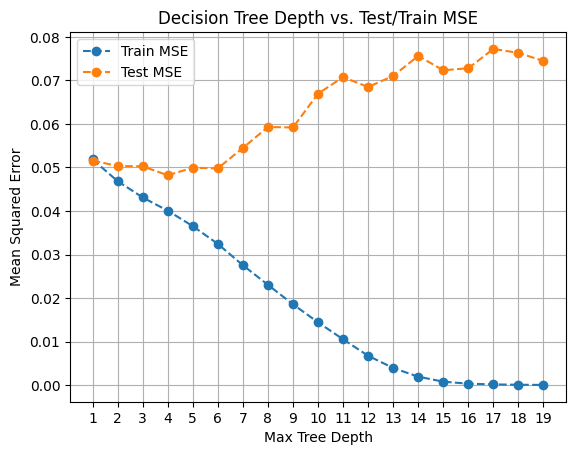

In [73]:
#Initialising Decision Tree
from sklearn.tree import DecisionTreeRegressor
train_scores = []
test_scores = []

# Trying different depths
for d in range(1, 20):
    dtree = DecisionTreeRegressor(max_depth=d, random_state=42)
    dtree.fit(X_train, y_train)

    # Predicting on train and test
    y_train_preds = dtree.predict(X_train)
    y_test_preds = dtree.predict(X_test)

    # Recording MSE
    train_scores.append(mean_squared_error(y_train, y_train_preds))
    test_scores.append(mean_squared_error(y_test, y_test_preds))

# Plotting the train vs test error
plt.plot(range(1, 20), train_scores, '--o', label='Train MSE')
plt.plot(range(1, 20), test_scores, '--o', label='Test MSE')
plt.xlabel('Max Tree Depth')
plt.ylabel('Mean Squared Error')
plt.title('Decision Tree Depth vs. Test/Train MSE')
plt.xticks(range(1, 20))
plt.grid()
plt.legend()
plt.show()


In [74]:
# Final model with best depth from plot
dtree = DecisionTreeRegressor(max_depth=4, random_state=42)
dtree.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=4, random_state=42)

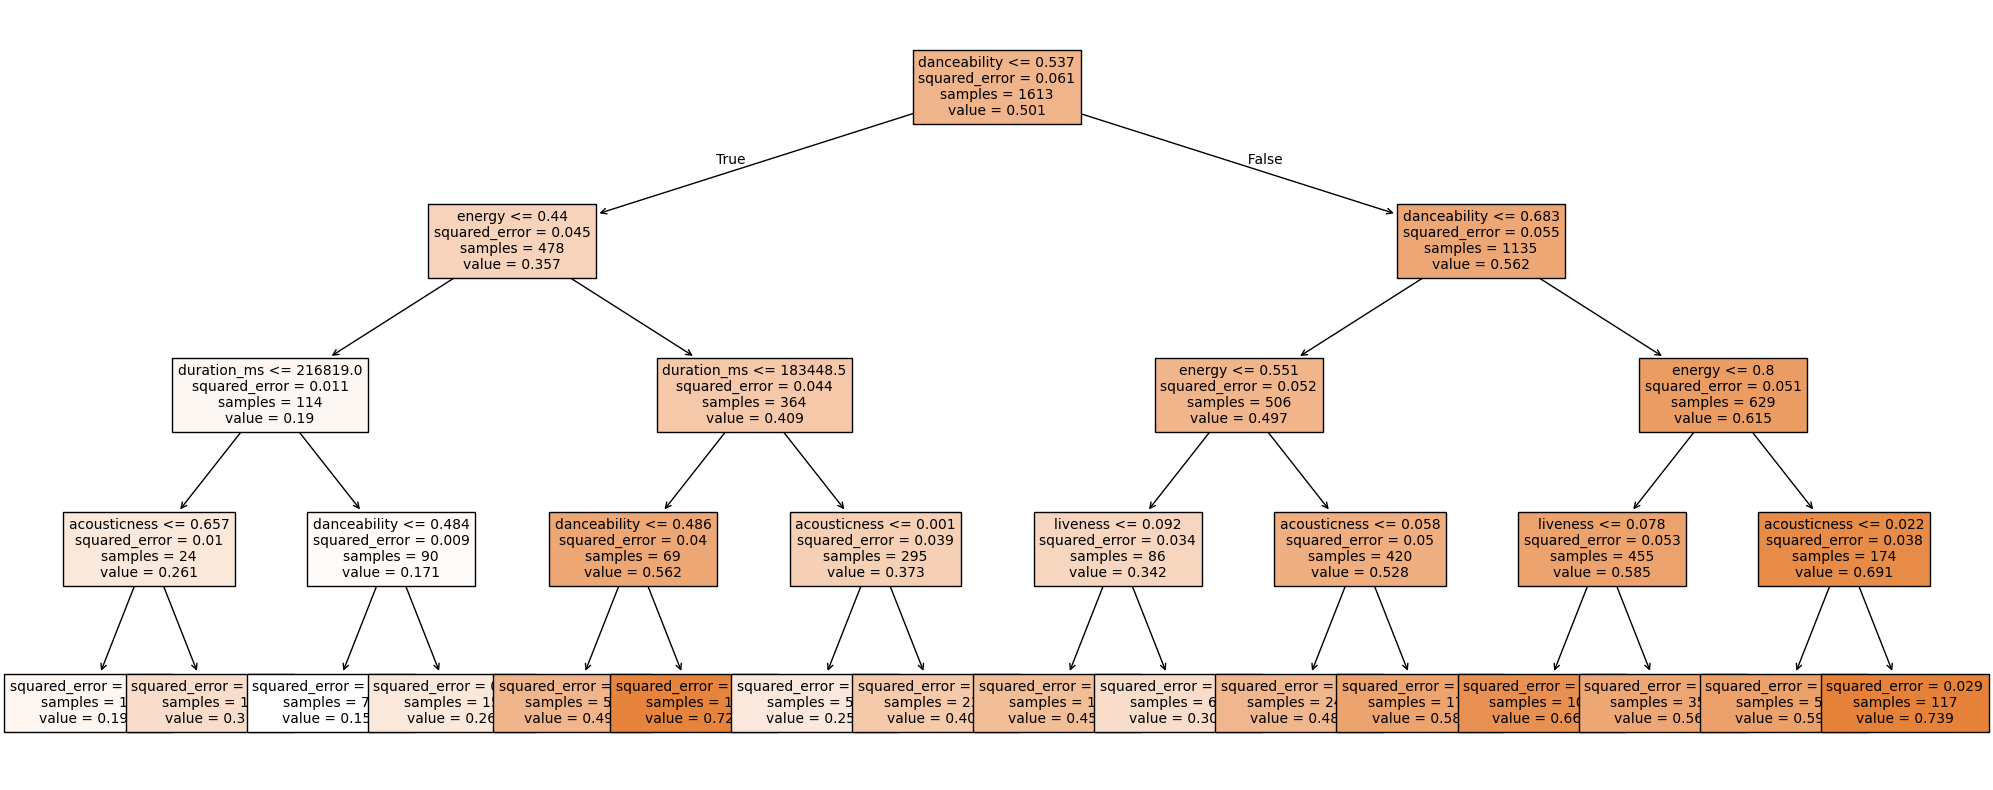

In [75]:
from sklearn.tree import plot_tree

#Plotting the Decision Tree
plt.figure(figsize=(25, 10))
plot_tree(dtree, filled=True, feature_names=X.columns, fontsize=10);


In [76]:
from sklearn.inspection import permutation_importance

# Outputting the MSE
print("Train MSE:", mean_squared_error(y_train, dtree.predict(X_train)))
print("Test MSE:", mean_squared_error(y_test, dtree.predict(X_test)))

# Finding the Feature Importance
r = permutation_importance(dtree, X_test, y_test, n_repeats=10)
importances = pd.DataFrame(r['importances_mean'], index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
importances


Train MSE: 0.04006851361535735
Test MSE: 0.048221907102841806


,Importance
danceability,0.295699
energy,0.102896
acousticness,0.059545
liveness,0.031086
duration_ms,0.023090
instrumentalness,0.000000
key,0.000000
loudness,0.000000
mode,0.000000
speechiness,0.000000


# KNN Regressor

In [77]:
# Import the KNN Regressor
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model (default k=5)
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)

# Predict and evaluate
knn_preds = knn_model.predict(X_test)
knn_mse = mean_squared_error(y_test, knn_preds)
knn_rmse = np.sqrt(knn_mse)

print(f"KNN Regressor MSE: {knn_mse:.6f}")
print(f"KNN Regressor RMSE: {knn_rmse:.6f}")


KNN Regressor MSE: 0.075444
KNN Regressor RMSE: 0.274670


# Neural Network

In [78]:
#Model 1 - Neural Network

In [79]:
# Import libraries
from sklearn.neural_network import MLPRegressor

In [80]:
# Select only important features for the Network
selected_features = ['danceability', 'energy', 'acousticness', 'liveness', 'duration_ms']
X = spotify[selected_features]
y = spotify['valence']

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [81]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [82]:
# Training a neural network
mlp = MLPRegressor(hidden_layer_sizes=(64, 64), activation='relu', solver='adam',
                   alpha=0.001, learning_rate='adaptive', max_iter=2000, random_state=42)

mlp.fit(X_train_scaled, y_train)

MLPRegressor(alpha=0.001, hidden_layer_sizes=(64, 64), learning_rate='adaptive',
             max_iter=2000, random_state=42)

In [83]:
# Predicting and evaluating the model
y_pred = mlp.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Neural Network MSE: {mse:.6f}")
print(f"Neural Network RMSE: {rmse:.6f}")

Neural Network MSE: 0.047101
Neural Network RMSE: 0.217027


In [84]:
##Model 2 - Neural Network

In [85]:
# Creating a MLP model with regularization
mlp = MLPRegressor(
    hidden_layer_sizes=(256, 128, 64, 32),
    activation='relu',
    solver='adam',
    alpha=0.001,  # L2 regularization
    batch_size=256,
    max_iter=500,
    early_stopping=True,
    random_state=42
)

# Training model
mlp.fit(X_train_scaled, y_train)

# Evaluating
train_pred = mlp.predict(X_train_scaled)
test_pred = mlp.predict(X_test_scaled)


print(f"Train MSE: {mean_squared_error(y_train, train_pred):.3f}")
print(f"Test MSE: {mean_squared_error(y_test, test_pred):.3f}")


Train MSE: 0.036
Test MSE: 0.046
